# Exercises week 43

**October 18-25, 2024**

Date: **Deadline is Friday October 25 at midnight**


# Overarching aims of the exercises this week

The aim of the exercises this week is to train the neural network you implemented last week.

To train neural networks, we use gradient descent, since there is no analytical expression for the optimal parameters. This means you will need to compute the gradient of the cost function wrt. the network parameters. And then you will need to implement some gradient method.

You will begin by computing gradients for a network with one layer, then two layers, then any number of layers. Keeping track of the shapes and doing things step by step will be very important this week.

We recommend that you do the exercises this week by editing and running this notebook file, as it includes some checks along the way that you have implemented the neural network correctly, and running small parts of the code at a time will be important for understanding the methods. If you have trouble running a notebook, you can run this notebook in google colab instead(https://colab.research.google.com/drive/1FfvbN0XlhV-lATRPyGRTtTBnJr3zNuHL#offline=true&sandboxMode=true), though we recommend that you set up VSCode and your python environment to run code like this locally.

First, some setup code that you will need.


In [3766]:
import autograd.numpy as np  # We need to use this numpy wrapper to make automatic differentiation work later
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


# Defining some activation functions
def ReLU(z):
    return np.where(z > 0, z, 0)


# Derivative of the ReLU function
def ReLU_der(z):
    return np.where(z > 0, 1, 0)


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def mse(predict, target):
    return np.mean((predict - target) ** 2)

# Exercise 1 - Understand the feed forward pass

**a)** Complete last weeks' mandatory exercises if you haven't already.


# Exercise 2 - Gradient with one layer using autograd

For the first few exercises, we will not use batched inputs. Only a single input vector is passed through the layer at a time.

In this exercise you will compute the gradient of a single layer. You only need to change the code in the cells right below an exercise, the rest works out of the box. Feel free to make changes and see how stuff works though!


**a)** If the weights and bias of a layer has shapes (10, 4) and (10), what will the shapes of the gradients of the cost function wrt. these weights and this bias be?


Answer: If we use the OLS cost function we will be (50, 1) since we have to take the partial derivative of all the components of the bias and the weights components.

**b)** Complete the feed_forward_one_layer function. It should use the sigmoid activation function. Also define the weigth and bias with the correct shapes.


In [3767]:
def feed_forward_one_layer(W, b, x):
    z = W @ x + b
    a = sigmoid(z)
    return a


def cost_one_layer(W, b, x, target):
    predict = feed_forward_one_layer(W, b, x)
    return mse(predict, target)


x = np.random.rand(2)

target = np.random.rand(3)

W = np.random.rand(3,2)
b = np.random.rand(3)

**c)** Compute the gradient of the cost function wrt. the weigth and bias by running the cell below. You will not need to change anything, just make sure it runs by defining things correctly in the cell above. This code uses the autograd package which uses backprogagation to compute the gradient!


In [3768]:
autograd_one_layer = grad(cost_one_layer, [0, 1])
W_g, b_g = autograd_one_layer(W, b, x, target)
print(W_g, b_g)

[[0.03093877 0.04362971]
 [0.02157616 0.0304266 ]
 [0.00217905 0.00307289]] [0.0914025  0.06374252 0.00643758]


# Exercise 3 - Gradient with one layer writing backpropagation by hand

Before you use the gradient you found using autograd, you will have to find the gradient "manually", to better understand how the backpropagation computation works. To do backpropagation "manually", you will need to write out expressions for many derivatives along the computation.


We want to find the gradient of the cost function wrt. the weight and bias. This is quite hard to do directly, so we instead use the chain rule to combine multiple derivatives which are easier to compute.

$$
\frac{dC}{dW} = \frac{dC}{da}\frac{da}{dz}\frac{dz}{dW}
$$

$$
\frac{dC}{db} = \frac{dC}{da}\frac{da}{dz}\frac{dz}{db}
$$


**a)** Which intermediary results can be reused between the two expressions?

Both expression make use of these two partial derivatives, so we can reuse these two

$$
\frac{dC}{da} , \frac{da}{dz}
$$


**b)** What is the derivative of the cost wrt. the final activation? You can use the autograd calculation to make sure you get the correct result. Remember that we compute the mean in mse.


In [3769]:
z = W @ x + b
a = sigmoid(z)

predict = a


def mse_der(predict, target):
    n = max(predict.shape)
    return 2*(predict - target)*(1/n)


print(mse_der(predict, target))

cost_autograd = grad(mse, 0)
print(cost_autograd(predict, target))

[0.42891556 0.27775259 0.03409906]
[0.42891556 0.27775259 0.03409906]


**c)** What is the expression for the derivative of the sigmoid activation function? You can use the autograd calculation to make sure you get the correct result.


In [3770]:
def sigmoid_der(z):
    return sigmoid(z)*(1-sigmoid(z))


print(sigmoid_der(z))

sigmoid_autograd = elementwise_grad(sigmoid, 0)
print(sigmoid_autograd(z))

[0.21310139 0.22949388 0.18879051]
[0.21310139 0.22949388 0.18879051]


**d)** Using the two derivatives you just computed, compute this intermetidary gradient you will use later:

$$
\frac{dC}{dz} = \frac{dC}{da}\frac{da}{dz}
$$


In [3771]:
dC_da = mse_der(predict,target)
dC_dz = dC_da*sigmoid_der(z)

**e)** What is the derivative of the intermediary z wrt. the weight and bias? What should the shapes be? The one for the weights is a little tricky, it can be easier to play around in the next exercise first. You can also try computing it with autograd to get a hint.

For the weights we will have,

$$
%\frac{dz}{dw} =  \begin{bmatrix}
%\mathbf{x}^{T}\\
%\vdots  \} n\\
%\mathbf{x}^{T}
%\end{bmatrix}
%$$

$$
\frac{dz}{dw} = x^{\top}
$$


which has the shape of $x$ but transposed. If $(n \times m)$ for number of data points times features, then $\frac{dz}{dw}$ is $(m \times n)$, in this example the final shape is $1 \times 2$. This works out because the derivative of the loss function is $(\text{output layer size} \times m)$, in this example $(3 \times 1)$ so the dot product of the two has size $(3 \times 2)$ which is the shape of the weights as expected.

$$
\begin{aligned}
\frac{dz}{dW} & = & \frac{dC}{dz} & \cdot & \frac{dz}{dW} \\
(3 \times 2) & =  & (3 \times \cancel{1}) & \cdot & (\cancel{1} \times 2)
\end{aligned}
$$

For the bias we will have a shape equvivalent to the bias.
$$
\frac{dz}{db} =  \mathbf{1}
$$



**f)** Now combine the expressions you have worked with so far to compute the gradients! Note that you always need to do a feed forward pass while saving the zs and as before you do backpropagation, as they are used in the derivative expressions


In [3772]:
dC_da = dC_da
dC_dz = dC_dz

# just transpose does not actually transpose
dz_dW = np.reshape(x, (2, 1))
dz_dW = np.transpose(dz_dW)

dz_db = np.ones_like(b)

# reshape to make dimensions match without upsetting rest of code by overwriting dC_dz
# all because numpy doesn't transpose a (2) vector to (1,2) but just keeps it as (2)
dC_dW = np.reshape(dC_dz, (3, 1)) @ dz_dW
dC_db = dC_dz * dz_db 

print(f'Weight gradient:\n {dC_dW} \n Bias gradient {dC_db}')


Weight gradient:
 [[0.03093877 0.04362971]
 [0.02157616 0.0304266 ]
 [0.00217905 0.00307289]] 
 Bias gradient [0.0914025  0.06374252 0.00643758]


You should get the same results as with autograd.


In [3773]:
W_g, b_g = autograd_one_layer(W, b, x, target)
print(f'Weight gradient:\n {W_g} \n Bias gradient {b_g}')

Weight gradient:
 [[0.03093877 0.04362971]
 [0.02157616 0.0304266 ]
 [0.00217905 0.00307289]] 
 Bias gradient [0.0914025  0.06374252 0.00643758]


# Exercise 4 - Gradient with two layers writing backpropagation by hand


Now that you have implemented backpropagation for one layer, you have found most of the expressions you will need for more layers. Let's move up to two layers.


In [3774]:
x = np.random.rand(2,1)
target = np.random.rand(4,1)

W1 = np.random.rand(3, 2)
b1 = np.random.rand(3,1)

W2 = np.random.rand(4, 3)
b2 = np.random.rand(4,1)

layers = [(W1, b1), (W2, b2)]

In [3775]:
z1 = W1 @ x + b1
a1 = sigmoid(z1)

z2 = W2 @ a1 + b2
a2 = sigmoid(z2)

predict2 = a2

We begin by computing the gradients of the last layer, as the gradients must be propagated backwards from the end.

**a)** Compute the gradients of the last layer, just like you did the single layer in the previous exercise.


In [3776]:
dC_da2 = mse_der(predict2,target)
dC_dz2 = dC_da2 * sigmoid_der(z2)

dz2_dW2 = np.transpose(a1)

dz2_db2 = np.ones_like(b2)

dC_dW2 = dC_dz2 @ dz2_dW2
dC_db2 = dC_dz2 * dz2_db2 


To find the derivative of the cost wrt. the activation of the first layer, we need a new expression, the one furthest to the right in the following.

$$
\frac{dC}{da_1} = \frac{dC}{dz_2}\frac{dz_2}{da_1}
$$

**b)** What is the derivative of the second layer intermetiate wrt. the first layer activation? (First recall how you compute $z_2$)

$$
z_2 = W_2 \cdot a_1 + b_2
$$

$$
\frac{dz_2}{da_1} = W_2^{\top}
$$


**c)** Use this expression, together with expressions which are equivelent to ones for the last layer to compute all the derivatives of the first layer.

$$
\frac{dC}{dW_1} = \frac{dC}{da_1}\frac{da_1}{dz_1}\frac{dz_1}{dW_1}
$$

$$
\frac{dC}{db_1} = \frac{dC}{da_1}\frac{da_1}{dz_1}\frac{dz_1}{db_1}
$$


In [3777]:
print(dC_dz2.shape)
print(W2.shape)
dC_da1 = W2.T @ dC_dz2
print(dC_da1.shape)

(4, 1)
(4, 3)
(3, 1)


In [3778]:
da1_dz1 = sigmoid_der(z1)
print(da1_dz1.shape)
dz1_dW1 = np.transpose(x)
print(dz1_dW1.shape)
dz1_db1 = np.ones_like(b1)
print(dz1_db1.shape)


(3, 1)
(1, 2)
(3, 1)


In [3779]:
dC_dW1 = (dC_da1 * da1_dz1) @ dz1_dW1
print(dC_dW1.shape)
dC_db1 = (dC_da1 * da1_dz1) * dz1_db1
print(dC_db1.shape)

(3, 2)
(3, 1)


In [3780]:
print(f'Cost derivative weights first layer: \n {dC_dW1.shape} \n {dC_dW1} \n Cost derivative bias: \n {dC_db1.shape} \n {dC_db1} \n \n')
print(f'Cost derivative weights second layer: \n {dC_dW2.shape} \n {dC_dW2} \n Cost derivatve bias: \n {dC_db2.shape} \n {dC_db2}')

Cost derivative weights first layer: 
 (3, 2) 
 [[0.00092602 0.00334422]
 [0.00046925 0.00169465]
 [0.00078899 0.00284936]] 
 Cost derivative bias: 
 (3, 1) 
 [[0.01175407]
 [0.00595624]
 [0.01001475]] 
 

Cost derivative weights second layer: 
 (4, 3) 
 [[0.02050093 0.02673059 0.02525361]
 [0.01189077 0.01550404 0.01464738]
 [0.00624431 0.00814178 0.00769191]
 [0.00125641 0.0016382  0.00154768]] 
 Cost derivatve bias: 
 (4, 1) 
 [[0.03694314]
 [0.02142744]
 [0.01125238]
 [0.00226408]]


**d)** Make sure you got the same gradient as the following code which uses autograd to do backpropagation.


In [3781]:
def feed_forward_two_layers(layers, x):
    W1, b1 = layers[0]
    z1 = W1 @ x + b1
    a1 = sigmoid(z1)

    W2, b2 = layers[1]
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)

    return a2

In [3782]:
def cost_two_layers(layers, x, target):
    predict = feed_forward_two_layers(layers, x)
    return mse(predict, target)


grad_two_layers = grad(cost_two_layers, 0)
grad_two_layers(layers, x, target)

[(array([[0.00092602, 0.00334422],
         [0.00046925, 0.00169465],
         [0.00078899, 0.00284936]]),
  array([[0.01175407],
         [0.00595624],
         [0.01001475]])),
 (array([[0.02050093, 0.02673059, 0.02525361],
         [0.01189077, 0.01550404, 0.01464738],
         [0.00624431, 0.00814178, 0.00769191],
         [0.00125641, 0.0016382 , 0.00154768]]),
  array([[0.03694314],
         [0.02142744],
         [0.01125238],
         [0.00226408]]))]

In [3783]:
for W_g_i, b_g_i in grad_two_layers(layers, x, target):
    print("Weight gradient")
    print(W_g_i.shape)
    print(W_g_i)

    print("Bias gradient")
    print(b_g_i.shape)
    print(b_g_i)

Weight gradient
(3, 2)
[[0.00092602 0.00334422]
 [0.00046925 0.00169465]
 [0.00078899 0.00284936]]
Bias gradient
(3, 1)
[[0.01175407]
 [0.00595624]
 [0.01001475]]
Weight gradient
(4, 3)
[[0.02050093 0.02673059 0.02525361]
 [0.01189077 0.01550404 0.01464738]
 [0.00624431 0.00814178 0.00769191]
 [0.00125641 0.0016382  0.00154768]]
Bias gradient
(4, 1)
[[0.03694314]
 [0.02142744]
 [0.01125238]
 [0.00226408]]


**e)** How would you use the gradient from this layer to compute the gradient of an even earlier layer? Would the expressions be any different?

The expression would basically be the same, we use ', 
$$\frac{\partial C_{n+1}}{\partial W_{n+1}} ,
\frac{\partial C_{n+1}}{\partial b_{n+1}}
$$

In order to find 

$$\frac{\partial C_{n}}{\partial W_{n}} ,
\frac{\partial C_{n}}{\partial b_{n}}
$$

Where to only thing we need from the previous layer is
$$\frac{\partial z_{n+1}}{\partial a_{n}}
$$
Otherwiese the process will be similar

# Exercise 5 - Gradient with any number of layers writing backpropagation by hand


Well done on getting this far! Now it's time to compute the gradient with any number of layers.

First, some code from the general neural network code from last week. Note that we are still sending in one input vector at a time. We will change it to use batched inputs later.


In [3784]:
def create_layers(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(layer_output_size, i_size)
        b = np.random.randn(layer_output_size, 1)
        layers.append((W, b))

        i_size = layer_output_size
    return layers


def feed_forward(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = W @ a + b
        a = activation_func(z)
    return a


def cost(layers, input, activation_funcs, target):
    predict = feed_forward(input, layers, activation_funcs)
    return mse(predict, target)

You might have already have noticed a very important detail in backpropagation: You need the values from the forward pass to compute all the gradients! The feed forward method above is great for efficiency and for using autograd, as it only cares about computing the final output, but now we need to also save the results along the way.

Here is a function which does that for you.


In [3785]:
def feed_forward_saver(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = W @ a + b
        a = activation_func(z)

        zs.append(z)

    return layer_inputs, zs, a

**a)** Now, complete the backpropagation function so that it returns the gradient of the cost function wrt. all the weigths and biases. Use the autograd calculation below to make sure you get the correct answer.


In [3786]:
def backpropagation(
    input, layers, activation_funcs, target, activation_ders, cost_der=mse_der
):
    layer_inputs, zs, predict = feed_forward_saver(input, layers, activation_funcs)
    print(f'Prediction is \n {predict}')

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]
        

        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict,target)
            print('Last, output layer')
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            dC_da = W.T @ dC_dz
            print('Hidden')

        da_dz = activation_der(z)
        print(f"{dC_da.shape=}")
        print(f"{da_dz.shape=}")
        dC_dz = dC_da*da_dz
        
        dC_db = dC_da*da_dz # multiplying by just ones doesn't matter

        dz_dW = np.transpose(layer_input)
        print(f"{dC_dz.shape=}")
        print(f"{dz_dW.shape=}")
        dC_dW = dC_dz @ dz_dW

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads

In [3787]:
np.random.seed(1)

network_input_size = 2
layer_output_sizes = [3,4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]

layers = create_layers(network_input_size, layer_output_sizes)

x = np.random.rand(network_input_size, 1)
target = np.random.rand(4, 1)

In [3788]:
layer_grads = backpropagation(x, layers, activation_funcs, target, activation_ders)
layer_grads

Prediction is 
 [[0.53052074]
 [0.94506556]
 [0.        ]
 [0.67702684]]
Last, output layer
dC_da.shape=(4, 1)
da_dz.shape=(4, 1)
dC_dz.shape=(4, 1)
dz_dW.shape=(1, 3)
Hidden
dC_da.shape=(3, 1)
da_dz.shape=(3, 1)
dC_dz.shape=(3, 1)
dz_dW.shape=(1, 2)


[(array([[-0.00065147, -0.0028267 ],
         [-0.00421466, -0.01828724],
         [ 0.01073804,  0.04659191]]),
  array([[-0.0063111 ],
         [-0.04082944],
         [ 0.10402452]])),
 (array([[-0.15828642, -0.04060292, -0.0660155 ],
         [ 0.27273946,  0.0699619 ,  0.1137497 ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.22900866,  0.05874427,  0.09551118]]),
  array([[-0.18903738],
         [ 0.32572571],
         [-0.        ],
         [ 0.27349913]]))]

In [3789]:
for W_g_i, b_g_i in layer_grads:
    print("Weight gradient")
    print(W_g_i.shape)
    print(W_g_i)

    print("Bias gradient")
    print(b_g_i.shape)
    print(b_g_i)

Weight gradient
(3, 2)
[[-0.00065147 -0.0028267 ]
 [-0.00421466 -0.01828724]
 [ 0.01073804  0.04659191]]
Bias gradient
(3, 1)
[[-0.0063111 ]
 [-0.04082944]
 [ 0.10402452]]
Weight gradient
(4, 3)
[[-0.15828642 -0.04060292 -0.0660155 ]
 [ 0.27273946  0.0699619   0.1137497 ]
 [ 0.          0.          0.        ]
 [ 0.22900866  0.05874427  0.09551118]]
Bias gradient
(4, 1)
[[-0.18903738]
 [ 0.32572571]
 [-0.        ]
 [ 0.27349913]]


In [3790]:
cost_grad = grad(cost, 0)
cost_grad(layers, x, activation_funcs, target)

[(array([[-0.00065147, -0.0028267 ],
         [-0.00421466, -0.01828724],
         [ 0.01073804,  0.04659191]]),
  array([[-0.0063111 ],
         [-0.04082944],
         [ 0.10402452]])),
 (array([[-0.15828642, -0.04060292, -0.0660155 ],
         [ 0.27273946,  0.0699619 ,  0.1137497 ],
         [ 0.        ,  0.        ,  0.        ],
         [ 0.22900866,  0.05874427,  0.09551118]]),
  array([[-0.18903738],
         [ 0.32572571],
         [ 0.        ],
         [ 0.27349913]]))]

In [3791]:
for W_g_i, b_g_i in cost_grad(layers, x, activation_funcs, target):
    print("Weight gradient")
    print(W_g_i.shape)
    print(W_g_i)

    print("Bias gradient")
    print(b_g_i.shape)
    print(b_g_i)

Weight gradient
(3, 2)
[[-0.00065147 -0.0028267 ]
 [-0.00421466 -0.01828724]
 [ 0.01073804  0.04659191]]
Bias gradient
(3, 1)
[[-0.0063111 ]
 [-0.04082944]
 [ 0.10402452]]
Weight gradient
(4, 3)
[[-0.15828642 -0.04060292 -0.0660155 ]
 [ 0.27273946  0.0699619   0.1137497 ]
 [ 0.          0.          0.        ]
 [ 0.22900866  0.05874427  0.09551118]]
Bias gradient
(4, 1)
[[-0.18903738]
 [ 0.32572571]
 [ 0.        ]
 [ 0.27349913]]


# Exercise 6 - Batched inputs

Make new versions of all the functions in exercise 5 which now take batched inputs instead. See last weeks exercise 5 for details on how to batch inputs to neural networks. You will also need to update the backpropogation function.


In [3792]:
def create_layers_batched(network_input_size, layer_output_sizes):
    layers = []

    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        W = np.random.randn(i_size, layer_output_size) # flipped
        b = np.random.randn(1, layer_output_size) # flipped
        layers.append((W, b))

        i_size = layer_output_size
    return layers


def feed_forward_saver_batched(input, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = a @ W + b # flipped
        a = activation_func(z)

        zs.append(z)

    return layer_inputs, zs, a

def feed_forward_batched(input, layers, activation_funcs):
    a = input
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b # flipped
        a = activation_func(z)
    return a

def cost_batched(layers, input, activation_funcs, target):
    predict = feed_forward_batched(input, layers, activation_funcs)
    return mse(predict, target)

def backpropagation_batched(
    input, layers, activation_funcs, target, activation_ders, cost_der=mse_der
):
    layer_inputs, zs, predict = feed_forward_saver_batched(input, layers, activation_funcs)
    #print(f'Prediction is \n {predict}')
    print(f"Prediction shape: {predict.shape}")

    layer_grads = [() for layer in layers]

    # We loop over the layers, from the last to the first
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]
        
        if i == len(layers) - 1:
            # For last layer we use cost derivative as dC_da(L) can be computed directly
            dC_da = cost_der(predict,target)
            print('Last, output layer')
        else:
            # For other layers we build on previous z derivative, as dC_da(i) = dC_dz(i+1) * dz(i+1)_da(i)
            (W, b) = layers[i + 1]
            print(f"{W.shape=}")
            print(f"{dC_dz.shape=}")

            dC_da = dC_dz @ W.T # flipped
            print("dC_da = dC_dz @ W.T")
            print(f"{dC_da.shape=}\n")
            print(f'Hidden layer {i}')

        da_dz = activation_der(z)
        print(f"{dC_da.shape=}")
        print(f"{da_dz.shape=}")
        dC_dz = dC_da*da_dz
        print("dC_dz = dC_da*da_dz")
        print(f"{dC_dz.shape=}\n")
        
        n = layer_input.shape[0] # number of data points in the input, the batch size
        m = target.shape[1] # number of final features, taken from the target

        # make array of ones in order to collapse shape of this derivative
        dz_db = np.ones((1, n))
        dC_db = (1/m) * dz_db @ dC_dz # flipped, divide by batch size
        print("dC_db = dz_db @ dC_dz")
        print(f"{dC_db.shape=}\n")

        dz_dW = np.transpose(layer_input)
        print(f"{dC_dz.shape=}")
        print(f"{dz_dW.shape=}")
        dC_dW = (1/m) * dz_dW @ dC_dz # flipped, divide by batch size
        print("dC_dW = dz_dW @ dC_dz")
        print(f"{dC_dW.shape=}\n")

        layer_grads[i] = (dC_dW, dC_db)

    return layer_grads

In [3793]:
np.random.seed(1)

network_input_size = 2
layer_output_sizes = [3,4]
activation_funcs = [sigmoid, ReLU]
activation_ders = [sigmoid_der, ReLU_der]

layers = create_layers_batched(network_input_size, layer_output_sizes)

x = np.random.rand(1000, network_input_size)
target = np.random.rand(1000, 4)

layer_grads = backpropagation_batched(x, layers, activation_funcs, target, activation_ders)
#layer_grads

Prediction shape: (1000, 4)
Last, output layer
dC_da.shape=(1000, 4)
da_dz.shape=(1000, 4)
dC_dz = dC_da*da_dz
dC_dz.shape=(1000, 4)

dC_db = dz_db @ dC_dz
dC_db.shape=(1, 4)

dC_dz.shape=(1000, 4)
dz_dW.shape=(3, 1000)
dC_dW = dz_dW @ dC_dz
dC_dW.shape=(3, 4)

W.shape=(3, 4)
dC_dz.shape=(1000, 4)
dC_da = dC_dz @ W.T
dC_da.shape=(1000, 3)

Hidden layer 0
dC_da.shape=(1000, 3)
da_dz.shape=(1000, 3)
dC_dz = dC_da*da_dz
dC_dz.shape=(1000, 3)

dC_db = dz_db @ dC_dz
dC_db.shape=(1, 3)

dC_dz.shape=(1000, 3)
dz_dW.shape=(2, 1000)
dC_dW = dz_dW @ dC_dz
dC_dW.shape=(2, 3)



In [3794]:
for W_g_i, b_g_i in layer_grads:
    print("Weight gradient")
    print(W_g_i.shape)
    print(W_g_i)

    print("Bias gradient")
    print(b_g_i.shape)
    print(b_g_i)

Weight gradient
(2, 3)
[[0.07043819 0.13135314 0.01439451]
 [0.09852667 0.14272598 0.00835983]]
Bias gradient
(1, 3)
[[0.17015037 0.26668834 0.02929616]]
Weight gradient
(3, 4)
[[ 0.02403973  0.91112346  0.         -0.09638273]
 [ 0.0127146   0.36926325  0.         -0.03589369]
 [ 0.00246486  0.27477346  0.         -0.03439088]]
Bias gradient
(1, 4)
[[ 0.02933998  1.04763288  0.         -0.1091209 ]]


In [3795]:
cost_grad = grad(cost_batched, 0)
#cost_grad(layers, x, activation_funcs, target)

In [3796]:
for W_g_i, b_g_i in cost_grad(layers, x, activation_funcs, target):
    print("Weight gradient")
    print(W_g_i.shape)
    print(W_g_i)

    print("Bias gradient")
    print(b_g_i.shape)
    print(b_g_i)

Weight gradient
(2, 3)
[[0.07043819 0.13135314 0.01439451]
 [0.09852667 0.14272598 0.00835983]]
Bias gradient
(1, 3)
[[0.17015037 0.26668834 0.02929616]]
Weight gradient
(3, 4)
[[ 0.02403973  0.91112346  0.         -0.09638273]
 [ 0.0127146   0.36926325  0.         -0.03589369]
 [ 0.00246486  0.27477346  0.         -0.03439088]]
Bias gradient
(1, 4)
[[ 0.02933998  1.04763288  0.         -0.1091209 ]]


## Dicussion

does not actually quite match - not sure what is wrong

tried training anyway but the accuracy is bad

code structure should be close though?

not sure why all the shapes are right, but the actual values are slightly off - the flips seem to be right to get the shapes correct

# Exercise 7 - Training


**a)** Complete exercise 6 and 7 from last week, but use your own backpropogation implementation to compute the gradient.

**b)** Use stochastic gradient descent with momentum when you train your network.


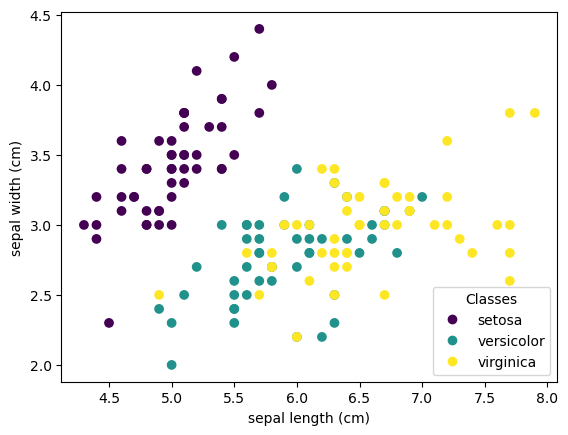

In [3797]:
iris = datasets.load_iris()

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [3798]:
inputs = iris.data

# Since each prediction is a vector with a score for each of the three types of flowers,
# we need to make each target a vector with a 1 for the correct flower and a 0 for the others.
targets = np.zeros((len(iris.data), 3))
for i, t in enumerate(iris.target):
    targets[i, t] = 1


def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)

    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

In [3799]:
def cross_entropy(predict, target):
    return np.sum(-target * np.log(predict))

iris_cost_der = grad(cross_entropy, 0)

def iris_cost(input, layers, activation_funcs, target):
    predict = feed_forward_batched(input, layers, activation_funcs)
    return cross_entropy(predict, target)

auto_cross_entropy_cost_grad = grad(iris_cost, 1)

In [3800]:
def softmax(z):
    """Compute softmax values for each set of scores in the rows of the matrix z.
    Used with batched input data."""
    e_z = np.exp(z - np.max(z, axis=0))
    return e_z / np.sum(e_z, axis=1)[:, np.newaxis]

In [3801]:
def softmax_der(z):
    Sz = softmax(z)
    return Sz

test_x = np.random.rand(2,1)

test_target = np.random.rand(3,1)

test_W = np.random.rand(3,2)
test_b = np.random.rand(3,1)
test_z = test_W @ test_x + test_b

print(softmax_der(test_z))

softmax_autograd = elementwise_grad(softmax, 0)
print(sigmoid_autograd(test_z))

[[1.]
 [1.]
 [1.]]
[[0.177404  ]
 [0.21060015]
 [0.203119  ]]


In [3802]:
inputs = iris.data
print(inputs.shape)
network_input_size = 4
layer_output_sizes = [8, 3]
activation_funcs = [sigmoid, softmax]
layers = create_layers_batched(network_input_size, layer_output_sizes)
activation_ders = [sigmoid_der, softmax_autograd]

(150, 4)


In [3809]:
def train_network(
    inputs, layers, activation_funcs, targets, activation_ders, cost_der=mse_der, learning_rate=0.001, epochs=100,
):
    trained_weight_layers = []
    trained_weight_layers.append(layers)
    for i in range(1, epochs):
        trained_weight_layers.append([])
        layers_grad_auto = auto_cross_entropy_cost_grad(inputs, trained_weight_layers[i-1], activation_funcs, targets)
        layers_grad = backpropagation_batched(inputs, trained_weight_layers[i-1], activation_funcs, targets, activation_ders, cost_der=cost_der)
        
        for (W_g, b_g), (W_g_auto, b_g_auto) in zip(layers_grad, layers_grad_auto):
            print(f"{W_g.shape=}, {b_g.shape=}, {W_g_auto.shape=}, {b_g_auto.shape=}")
            print(f"{W_g=} \n{b_g=} \n{W_g_auto=} \n{b_g_auto=}")
        
        # update each weight
        for (W, b), (W_g, b_g) in zip(trained_weight_layers[i-1], layers_grad):
            #print(W.shape, b.shape, W_g.shape, b_g.shape)
            new_W = W - learning_rate*W_g
            new_b = b - learning_rate*b_g
            trained_weight_layers[i].append((new_W, new_b))

    return trained_weight_layers

In [3810]:
epochs = 100
lr = 0.01
trained_weight_layers = train_network(inputs, layers, activation_funcs, targets, activation_ders, cost_der=iris_cost_der, learning_rate=lr, epochs=epochs)
# predictions made with the last weights from the training, the best ones
trained_predictions = feed_forward_batched(inputs, trained_weight_layers[-1], activation_funcs)

print(accuracy(trained_predictions, targets))

Prediction shape: (150, 3)
Last, output layer
dC_da.shape=(150, 3)
da_dz.shape=(150, 3)
dC_dz = dC_da*da_dz
dC_dz.shape=(150, 3)

dC_db = dz_db @ dC_dz
dC_db.shape=(1, 3)

dC_dz.shape=(150, 3)
dz_dW.shape=(8, 150)
dC_dW = dz_dW @ dC_dz
dC_dW.shape=(8, 3)

W.shape=(8, 3)
dC_dz.shape=(150, 3)
dC_da = dC_dz @ W.T
dC_da.shape=(150, 8)

Hidden layer 0
dC_da.shape=(150, 8)
da_dz.shape=(150, 8)
dC_dz = dC_da*da_dz
dC_dz.shape=(150, 8)

dC_db = dz_db @ dC_dz
dC_db.shape=(1, 8)

dC_dz.shape=(150, 8)
dz_dW.shape=(4, 150)
dC_dW = dz_dW @ dC_dz
dC_dW.shape=(4, 8)

W_g.shape=(4, 8), b_g.shape=(1, 8), W_g_auto.shape=(4, 8), b_g_auto.shape=(1, 8)
W_g=array([[ 4.89649632e-17,  1.10996522e-17, -3.20027945e-19,
         7.57286982e-18, -2.13768496e-17, -2.73799557e-20,
        -1.08721566e-17,  6.99744021e-21],
       [ 1.68367760e-17,  5.27415913e-18, -1.41631040e-19,
         7.71499357e-18, -1.26055994e-17,  1.17030572e-20,
        -8.58328398e-18,  2.65155094e-20],
       [ 3.76130743e-17,  6.510728

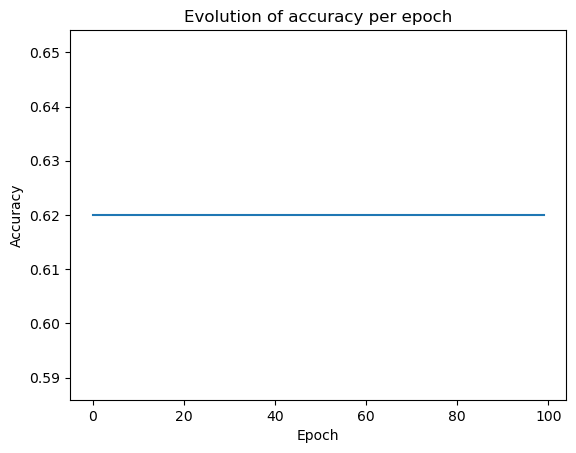

In [3805]:
predictions_per_epoch = [feed_forward_batched(inputs, trained_weight_layer, activation_funcs) for trained_weight_layer in trained_weight_layers]
list_of_accuracies = [accuracy(epoch_prediction, targets) for epoch_prediction in predictions_per_epoch]

plt.plot(range(epochs), list_of_accuracies)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Evolution of accuracy per epoch")
plt.show()

# Exercise 8 (Optional) - Object orientation

Passing in the layers, activations functions, activation derivatives and cost derivatives into the functions each time leads to code which is easy to understand in isoloation, but messier when used in a larger context with data splitting, data scaling, gradient methods and so forth. Creating an object which stores these values can lead to code which is much easier to use.

**a)** Write a neural network class. You are free to implement it how you see fit, though we strongly recommend to not save any input or output values as class attributes, nor let the neural network class handle gradient methods internally. Gradient methods should be handled outside, by performing general operations on the layer_grads list using functions or classes separate to the neural network.

We provide here a skeleton structure which should get you started.


In [3806]:
class NeuralNetwork:
    def __init__(
        self,
        network_input_size,
        layer_output_sizes,
        activation_funcs,
        activation_ders,
        cost_fun,
        cost_der,
    ):
        pass

    def predict(self, inputs):
        # Simple feed forward pass
        pass

    def cost(self, inputs, targets):
        pass

    def _feed_forward_saver(self, inputs):
        pass

    def compute_gradient(self, inputs, targets):
        pass

    def update_weights(self, layer_grads):
        pass

    # These last two methods are not needed in the project, but they can be nice to have! The first one has a layers parameter so that you can use autograd on it
    def autograd_compliant_predict(self, layers, inputs):
        pass

    def autograd_gradient(self, inputs, targets):
        pass